<a href="https://colab.research.google.com/github/yohan20-coder/Analisis-Sentimen-Endeime-Algoritma-Naive-Bayes/blob/main/Analisis-Sentimen-Endeime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. TAHAP IMPORT LIBRARI**

In [23]:
!pip install Sastrawi

In [24]:
# ==========================
# 1. Import Library
# ==========================
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## **2. TAHAP LOAD DATASET**

In [25]:
# 2. Load Dataset
# ==========================
df = pd.read_csv("/content/sample_data/endeisme_dataset_sentimen.csv")

print("Jumlah data:", len(df))
print(df.head())

# Bersihkan NaN
df = df.dropna()
df['text'] = df['text'].fillna('')
df['label'] = df['label'].fillna('netral')

Jumlah data: 103
                                                                  text  \
Motif tenun ikat Flores sangat indah dan unik        saya suka sekali.   
Kualitas kain tenun Flores kurang halus menurut...             negatif   
Tenun ikat Ende cocok dipakai untuk acara resmi         sangat elegan.   
Harga pakaian tenun terlalu mahal dibanding kua...             negatif   
Tenun khas Flores memiliki nilai budaya tinggi             luar biasa.   

                                                      label  
Motif tenun ikat Flores sangat indah dan unik       positif  
Kualitas kain tenun Flores kurang halus menurut...      NaN  
Tenun ikat Ende cocok dipakai untuk acara resmi     positif  
Harga pakaian tenun terlalu mahal dibanding kua...      NaN  
Tenun khas Flores memiliki nilai budaya tinggi      positif  


## **3. TAHAP PREPOCESSING DATA**

In [26]:
# ==========================
# 3. Preprocessing
# ==========================

# Buat stemmer dan stopword remover
stemmer = StemmerFactory().create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus spasi berlebih
    text = text.strip()
    # Tokenisasi manual
    tokens = text.split()
    # Stopword removal
    tokens = [w for w in tokens if w not in stopwords]
    # Stemming
    tokens = [stemmer.stem(w) for w in tokens]
    return ' '.join(tokens)

df["clean_text"] = df["text"].apply(preprocess)

print("\nHasil Preprocessing:")
print(df[["text", "clean_text"]].head())


# ==========================
# TF-IDF
# ==========================
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

# Split train-test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


Hasil Preprocessing:
                                                               text  \
Motif tenun ikat Flores sangat indah dan unik     saya suka sekali.   
Tenun ikat Ende cocok dipakai untuk acara resmi      sangat elegan.   
Tenun khas Flores memiliki nilai budaya tinggi          luar biasa.   
Saya kurang suka rasa Kopi Flores                     terlalu kuat.   
Kentang Goreng khas Flores enak sekali            gurih dan renyah.   

                                                    clean_text  
Motif tenun ikat Flores sangat indah dan unik      suka sekali  
Tenun ikat Ende cocok dipakai untuk acara resmi  sangat elegan  
Tenun khas Flores memiliki nilai budaya tinggi      luar biasa  
Saya kurang suka rasa Kopi Flores                 terlalu kuat  
Kentang Goreng khas Flores enak sekali            gurih renyah  


## **4. TAHAP CLASSIFICATION DENGAN ALGORITMA NAIVE BAYES**

In [27]:
# ==========================
# 5. Naive Bayes Classification
# ==========================
model = MultinomialNB()
model.fit(X_train, y_train)
# Prediksi
y_pred = model.predict(X_test)
print(model)


MultinomialNB()


## **5. TAHAP EVALUASI**


Akurasi: 1.0

Classification Report:
              precision    recall  f1-score   support

     positif     1.0000    1.0000    1.0000         2

    accuracy                         1.0000         2
   macro avg     1.0000    1.0000    1.0000         2
weighted avg     1.0000    1.0000    1.0000         2



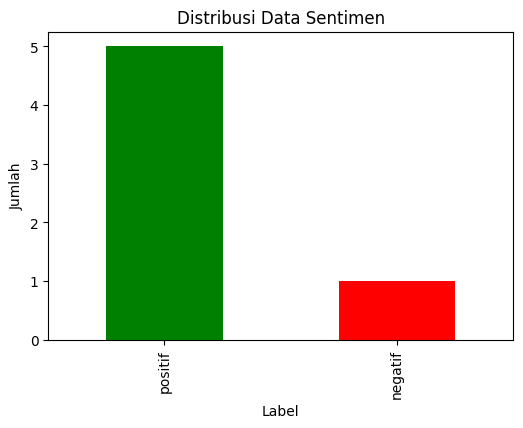

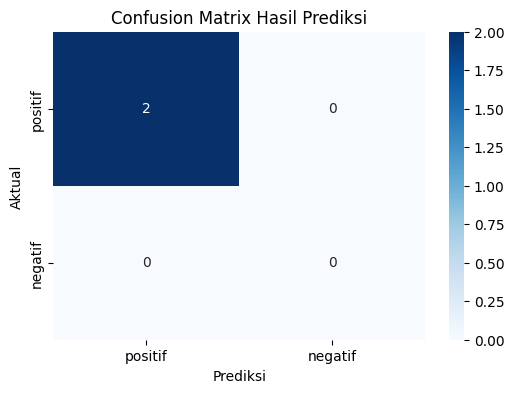

In [28]:
# ==========================
# 6. Evaluasi
# ==========================
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ==========================
# 6a. Visualisasi Distribusi Label
# ==========================
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Distribusi Data Sentimen")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

# ==========================
# 6b. Confusion Matrix
# ==========================
cm = confusion_matrix(y_test, y_pred, labels=["positif","negatif"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positif","negatif"], yticklabels=["positif","negatif"])
plt.title("Confusion Matrix Hasil Prediksi")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()